In [7]:
#!pip install fastbook

##### A. Single Label Classification

In [4]:
from fastai.vision.all import *

In [5]:
path = untar_data(URLs.PETS)

In [6]:
path.ls()

(#2) [Path('/home/ec2-user/.fastai/data/oxford-iiit-pet/images'),Path('/home/ec2-user/.fastai/data/oxford-iiit-pet/annotations')]

In [8]:
files = get_image_files(path/"images")
len(files)

7390

In [9]:
def label_func(f): return f[0].isupper()

In [17]:
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(224))

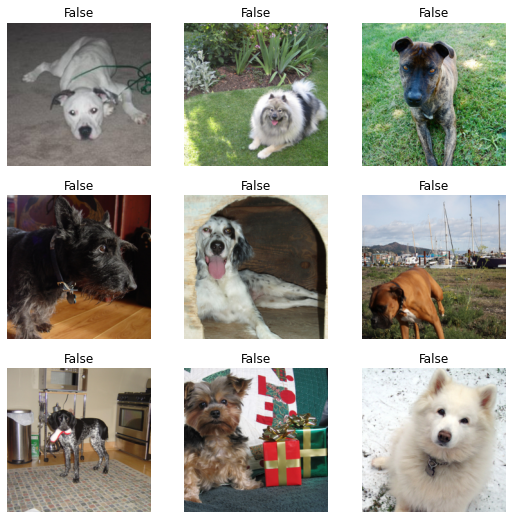

In [18]:
dls.show_batch()


In [19]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.156899,0.013215,0.004060,00:13


epoch,train_loss,valid_loss,error_rate,time
0,0.056522,0.015893,0.003383,00:15


In [20]:
learn.predict(files[0])

('True', TensorBase(1), TensorBase([2.3427e-04, 9.9977e-01]))

In [23]:
import re

In [24]:
pat = r'^(.*)_\d+.jpg'

In [62]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(224))

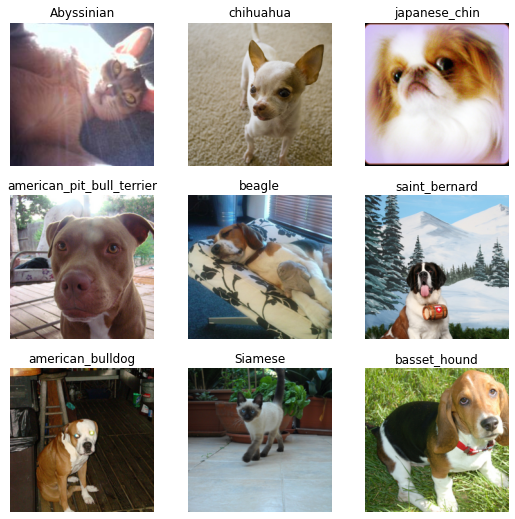

In [63]:
dls.show_batch()

In [64]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(460),
                                    batch_tfms=aug_transforms(size=224))

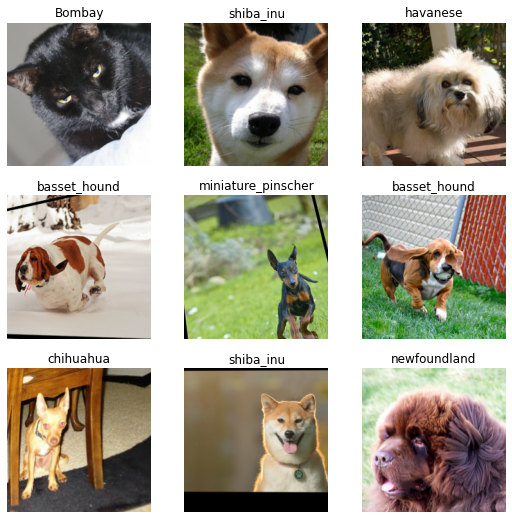

In [65]:
dls.show_batch()

In [66]:
learn = vision_learner(dls, resnet34, metrics=error_rate)

SuggestedLRs(valley=0.0008317637839354575)

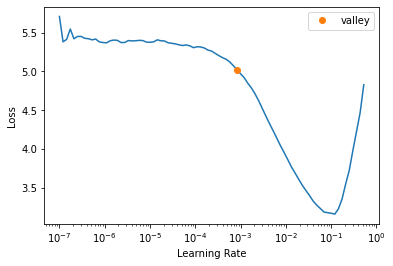

In [67]:
learn.lr_find()

In [73]:
learn.fine_tune(3, 8e-4)

epoch,train_loss,valid_loss,error_rate,time
0,0.201459,0.233721,0.073748,00:19


epoch,train_loss,valid_loss,error_rate,time
0,0.185230,0.246410,0.073748,00:20
1,0.148763,0.220364,0.063599,00:20
2,0.113590,0.210847,0.063599,00:20


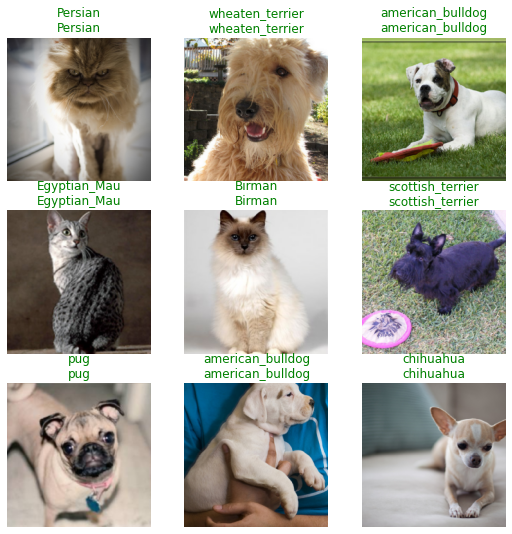

In [69]:
learn.show_results()

In [45]:
interp = Interpretation.from_learner(learn)

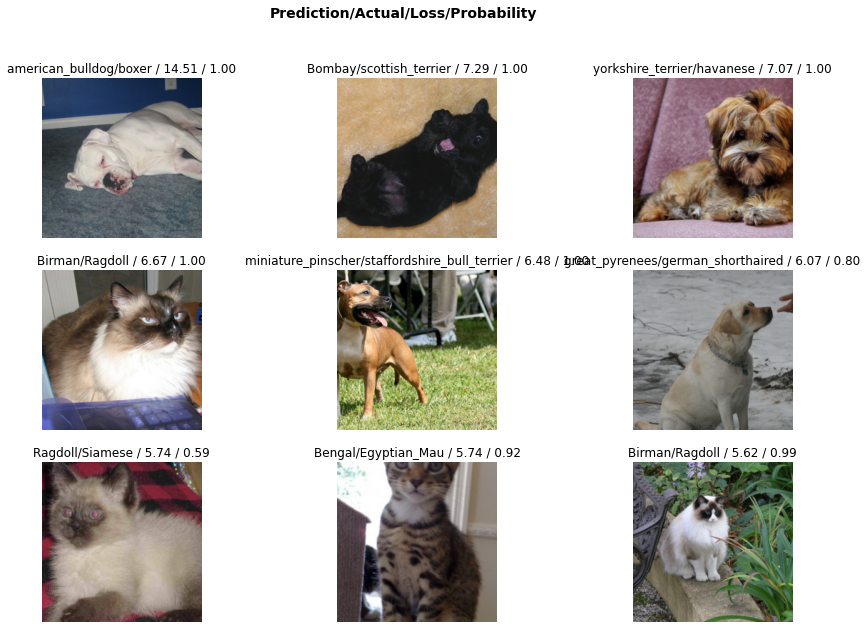

In [46]:
interp.plot_top_losses(9, figsize=(15,10))

In [47]:
pets = DataBlock(blocks=(ImageBlock, CategoryBlock), 
                 get_items=get_image_files, 
                 splitter=RandomSplitter(),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224))

In [48]:
dls = pets.dataloaders(untar_data(URLs.PETS)/"images")

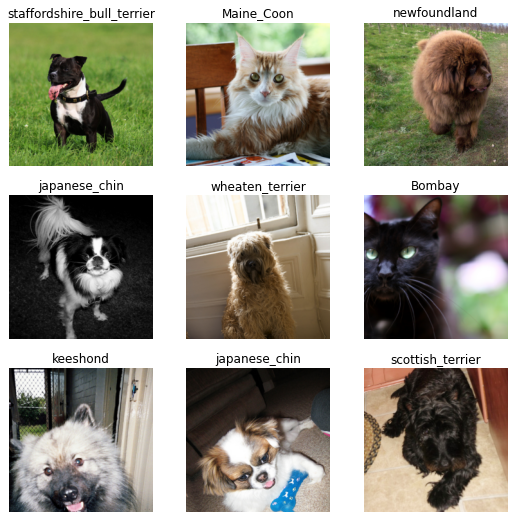

In [49]:
dls.show_batch(max_n=9)


In [50]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,1.445799,0.345190,0.120433,00:18


epoch,train_loss,valid_loss,error_rate,time
0,0.500490,0.294931,0.094723,00:20
